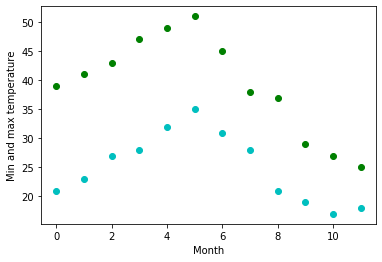

In [2]:
#Scipy:
#We have the min and max temperatures in a city In India for each months of the year.
#We would like to find a function to describe this and show it graphically
import numpy as np

temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

import matplotlib.pyplot as plt
months = np.arange(12)
plt.plot(months, temp_max, 'go')
plt.plot(months, temp_min, 'co')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')
plt.show()

In [3]:
#Fitting it to a periodic function
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                      temp_min, [-40, 20, 0])



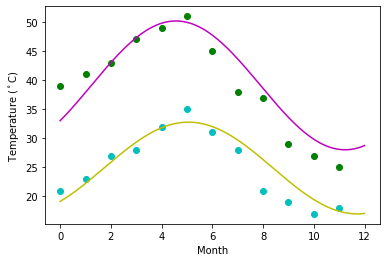

In [4]:
#plot the fit
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(months, temp_min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

In [8]:
#This assignment is for visualization using matplotlib:
#titanic = pd.read_csv(url)
#Charts to plot:
#. Create a pie chart presenting the male/female proportion
#. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
df=pd.read_csv('titanic.csv',index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 1 to 156
Data columns (total 11 columns):
Survived    156 non-null int64
Pclass      156 non-null int64
Name        156 non-null object
Sex         156 non-null object
Age         126 non-null float64
SibSp       156 non-null int64
Parch       156 non-null int64
Ticket      156 non-null object
Fare        156 non-null float64
Cabin       31 non-null object
Embarked    155 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 14.6+ KB


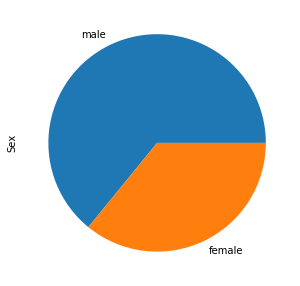

In [11]:
#Let’s 1st find how many male and female were present on titanic ship
plt.figure(figsize=(5,5))
df.Sex.value_counts().plot(kind = 'pie')

In [13]:
df.Sex.value_counts()

male      100
female     56
Name: Sex, dtype: int64

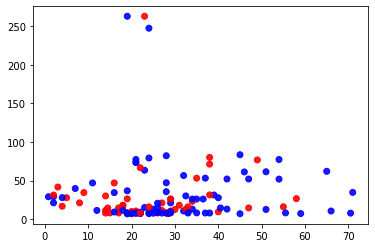

In [26]:
#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df=df.dropna(subset=['Sex'])

mapping = {'male' : 'blue', 'female' : 'red'}
plt.scatter(df['Age'],df['Fare'], alpha=0.9, c=df['Sex'].map(mapping))
plt.xlabel=("age")
plt.ylabel=("fare")
plt.show()